26


Text(0, 0.5, 'height in m')

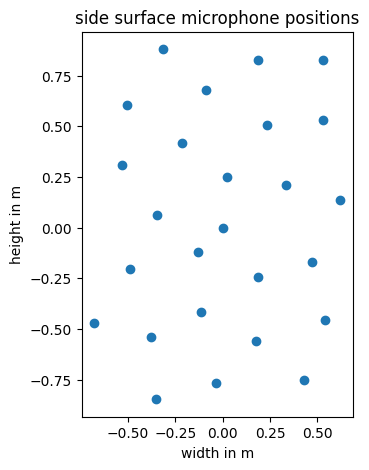

In [16]:
## Seitenflächen
import numpy as np
import matplotlib.pyplot as plt

M = 32
m = np.arange(M)
V = 5
R = 1

r = R*np.sqrt(m/M)
phi = 2*np.pi*m*((1+np.sqrt(V))/2)

x = np.asarray(r*np.cos(phi))
y = np.asarray(r*np.sin(phi))
coord = np.array([x,y])
coord_cut = np.array([x[(x >= -0.7) & (x <= 0.7)],y[(x >= -0.7) & (x <= 0.7)]])

print(len(coord_cut[1]))

fig = plt.figure(figsize=[3.5,5])
ax = fig.add_subplot()
pl = ax.scatter(coord_cut[0],coord_cut[1])
ax.set_title('side surface microphone positions')
ax.set_xlabel('width in m')
ax.set_ylabel('height in m')

18


Text(0, 0.5, 'length in m')

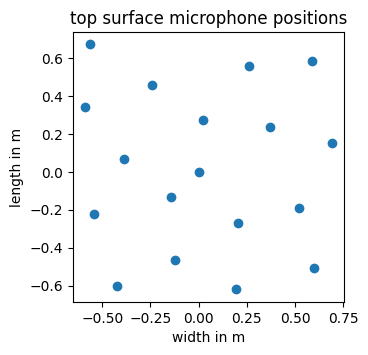

In [17]:
## Deckfläche
import numpy as np
import matplotlib.pyplot as plt

M = 26
m = np.arange(M)
V = 5
R = 1

r = R*np.sqrt(m/M)
phi = 2*np.pi*m*((1+np.sqrt(V))/2)

x = np.asarray(r*np.cos(phi))
y = np.asarray(r*np.sin(phi))
coord = np.array([x,y])
coord_cut = np.array([x[(x >= -0.7) & (x <= 0.7) & (y >= -0.7) & (y <= 0.7)],y[(x >= -0.7) & (x <= 0.7) & (y >= -0.7) & (y <= 0.7)]])

print(len(coord_cut[1]))

fig = plt.figure(figsize=[3.5,3.5])
ax = fig.add_subplot()
pl = ax.scatter(coord_cut[0],coord_cut[1])
ax.set_title('top surface microphone positions')
ax.set_xlabel('width in m')
ax.set_ylabel('length in m')